In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json


In [ ]:
plt.style.use('ggplot')

In [ ]:
with open('cleaned_entities.json', 'r') as f:
    cej = json.loads(f.read())

In [ ]:
for row in cej:
    print(row)
    break
    

{'year': '2016', 'month': '1', 'day': '10', 'slug': 'wice-2016-cornell-colgate', 'url': 'https://www.thecrimson.com/article/2016/1/10/wice-2016-cornell-colgate/\n', 'named_entities': ['Grace Zarzecki']}


In [ ]:
numMentions = {}
for row in cej:
    for person in row['named_entities']:
        cleanName = person.split()[0].lower() + ' ' + person.split()[-1].lower()
        if cleanName not in numMentions:
            numMentions[cleanName] = 1
        else:
            numMentions[cleanName] += 1

In [ ]:
print(max(numMentions[p] for p in numMentions))

237


In [ ]:
fbdf = pd.read_csv('facebook.csv')
teamsdf = pd.read_csv('teams.csv')
writersdf = pd.read_csv('writers.csv')

In [ ]:
fbdf.head()

,First Name,Last Name,Email,Phone,House,Assigned House,Year
0,Aishani,Aatresh,aishaniaatresh@college,NaN,NaN,NaN,First-Year
1,Aaron,Abai,aaronabai@college,NaN,Mather,NaN,Junior
2,Kian,Abbott,kianabbott@college,NaN,Pforzheimer,Pforzheimer,Sophomore
3,Julia,Abbruzzese,juliaabbruzzese@college,NaN,Mather,NaN,First-Year
4,Hoda,Abdalla,NaN,NaN,NaN,NaN,Sophomore


In [ ]:
fbdf['cleanName'] = fbdf['First Name'].str.lower() + ' ' + fbdf['Last Name'].str.lower()

In [ ]:
fbdf['Year'] = fbdf['Year'].replace(['First-Year'],'Class of 2024')
fbdf['Year'] = fbdf['Year'].replace(['Sophomore'],'Class of 2023')
fbdf['Year'] = fbdf['Year'].replace(['Junior'],'Class of 2022')
fbdf['Year'] = fbdf['Year'].replace(['Senior'],'Class of 2021')



In [ ]:
fbdf.head()

,First Name,Last Name,Email,Phone,House,Assigned House,Year,cleanName
0,Aishani,Aatresh,aishaniaatresh@college,NaN,NaN,NaN,Class of 2024,aishani aatresh
1,Aaron,Abai,aaronabai@college,NaN,Mather,NaN,Class of 2022,aaron abai
2,Kian,Abbott,kianabbott@college,NaN,Pforzheimer,Pforzheimer,Class of 2023,kian abbott
3,Julia,Abbruzzese,juliaabbruzzese@college,NaN,Mather,NaN,Class of 2024,julia abbruzzese
4,Hoda,Abdalla,NaN,NaN,NaN,NaN,Class of 2023,hoda abdalla


In [ ]:
teamsdf.head()

,index,name,team,gender
0,0,Anna Burt,cross country,1.0
1,1,Aislinn Devlin,cross country,1.0
2,2,Valentina Doerre Torre,cross country,1.0
3,3,Eloise Freitag,cross country,1.0
4,4,Abbe Goldstein,cross country,1.0


In [ ]:
teamsdf['name'].str.split().apply(lambda x: x[0].lower())

0           anna
1        aislinn
2      valentina
3         eloise
4           abbe
         ...    
679          max
680        derek
681     mitchell
682        derek
683        casey
Name: name, Length: 684, dtype: object

In [ ]:
teamsdf['cleanName'] = teamsdf['name'].str.split().apply(lambda x: x[0].lower()) + ' ' + teamsdf['name'].str.split().apply(lambda x: x[-1].lower())

In [ ]:
teamsdf.head()

,index,name,team,gender,cleanName
0,0,Anna Burt,cross country,1.0,anna burt
1,1,Aislinn Devlin,cross country,1.0,aislinn devlin
2,2,Valentina Doerre Torre,cross country,1.0,valentina torre
3,3,Eloise Freitag,cross country,1.0,eloise freitag
4,4,Abbe Goldstein,cross country,1.0,abbe goldstein


In [ ]:
genderDict = dict(zip(teamsdf['cleanName'], teamsdf['gender']))
teamDict = dict(zip(teamsdf['cleanName'], teamsdf['team']))
houseDict = dict(zip(fbdf['cleanName'], fbdf['House']))
yearDict = dict(zip(fbdf['cleanName'], fbdf['Year']))

In [ ]:
allNames = list(set(teamsdf['cleanName']) | set(fbdf['cleanName']) | set(numMentions.keys()))

In [ ]:
len(allNames)

5310

In [ ]:
df_builder = {
    'name': [],
    'numMentions': [],
    'gender': [],
    'team': [],
    'house': [],
    'year': [],
}
for cleanName in allNames:
    df_builder['name'].append(cleanName)
    df_builder['numMentions'].append(numMentions.get(cleanName) or 0)
    df_builder['gender'].append(genderDict.get(cleanName))
    df_builder['team'].append(teamDict.get(cleanName))
    df_builder['house'].append(houseDict.get(cleanName))
    df_builder['year'].append(yearDict.get(cleanName))
    

In [ ]:
df = pd.DataFrame(df_builder)

In [ ]:
len(df)

5310

In [ ]:
df['house'] = df['house'].replace(['Pfoho'],'Pforzheimer')
df['house'].value_counts()

Quincy              249
Kirkland            238
Leverett            238
Eliot               236
Lowell              235
Winthrop            232
Mather              225
Adams               224
Cabot               217
Dunster             211
Pforzheimer         209
Currier             195
Wigglesworth         75
Canaday              60
McKinlock            41
Grays                36
Elm Yard             36
Straus               36
Crimson Yard         31
Dudley Community     31
Weld                 31
Ivy Yard             28
Holworthy            27
Oak Yard             27
Greenough            22
Lionel               18
Thayer               17
Hollis               16
Hurlbut              15
Matthews             14
Mower                14
Stoughton            14
Apley                11
Massachusetts         2
Name: house, dtype: int64

In [ ]:
df.head()

,name,numMentions,gender,team,house,year
0,rebecca hayes,0,NaN,None,Pforzheimer,Class of 2023
1,kale catchings,9,0.0,basketball,Lowell,Class of 2022
2,elliott hyman,0,NaN,None,Currier,Class of 2023
3,kofi kwapong,0,NaN,None,Leverett,Class of 2021
4,alex lee,0,0.5,sailing,None,None


In [ ]:
df.describe()

,numMentions,gender
count,5310.000000,668.000000
mean,1.234087,0.441617
std,8.700777,0.485507
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,237.000000,1.000000


In [ ]:
df['year'].value_counts()

Class of 2024    1401
Class of 2023    1328
Class of 2021    1288
Class of 2022    1165
Visiting           35
Name: year, dtype: int64

In [ ]:
df['gender'].value_counts()

0.0    358
1.0    280
0.5     30
Name: gender, dtype: int64

In [ ]:
df['team'].value_counts()

football              96
track                 67
swimming              49
lightweight rowing    47
heavyweight rowing    45
lacrosse              41
soccer                40
ice hockey            29
basketball            28
baseball              27
water polo            26
wrestling             24
rugby                 24
tennis                22
volleyball            21
sailing               18
fencing               15
squash                15
skiing                12
field hockey          11
golf                   9
cross country          2
Name: team, dtype: int64

In [ ]:
df.groupby('year')['numMentions'].sum()

year
Class of 2021    3234
Class of 2022    2212
Class of 2023     904
Class of 2024     203
Visiting            0
Name: numMentions, dtype: int64

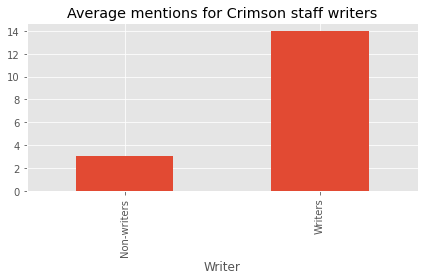

In [ ]:
writersdf.groupby('Writer')['Mentions'].mean().plot.bar()
plt.title('Average mentions for Crimson staff writers')
plt.xticks(np.arange(2), ['Non-writers', 'Writers'])
plt.tight_layout()
plt.savefig('writers.pdf', dpi=400)

In [ ]:
writersdf.groupby('Writer')['Mentions'].mean()

Writer
0     3.066462
1    13.964567
Name: Mentions, dtype: float64

<AxesSubplot:xlabel='year'>

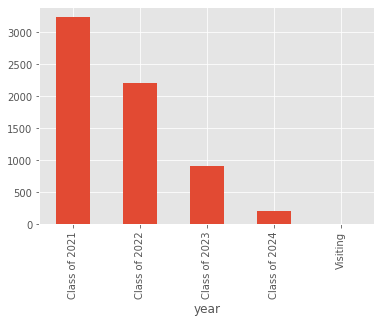

In [ ]:
df.groupby('year')['numMentions'].sum().plot.bar()

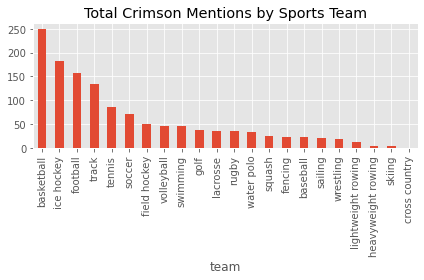

In [ ]:
df.groupby('team')['numMentions'].sum().sort_values(0, ascending=False).plot.bar()
plt.title('Total Crimson Mentions by Sports Team')
plt.tight_layout()
plt.savefig('teams.pdf', dpi=400)

In [ ]:
df.groupby('team')['numMentions'].sum().sort_values(0, ascending=False)

team
basketball            249
ice hockey            182
football              157
track                 134
tennis                 85
soccer                 72
field hockey           50
volleyball             47
swimming               45
golf                   38
lacrosse               36
rugby                  35
water polo             34
squash                 24
fencing                23
baseball               22
sailing                21
wrestling              18
lightweight rowing     13
heavyweight rowing      5
skiing                  3
cross country           0
Name: numMentions, dtype: int64

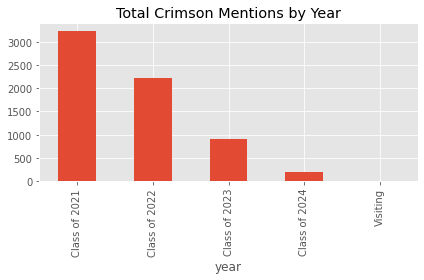

In [ ]:
df.groupby('year')['numMentions'].sum().plot.bar()
plt.title('Total Crimson Mentions by Year')
plt.tight_layout()
plt.savefig('years.pdf', dpi=400)

In [ ]:
df.groupby('house')['numMentions'].mean().sort_values(ascending=False)

house
Adams               2.982143
Quincy              1.863454
Lowell              1.787234
Mather              1.400000
Currier             1.307692
Cabot               1.216590
Kirkland            1.180672
Leverett            0.957983
Winthrop            0.956897
Dunster             0.924171
Pforzheimer         0.760766
Eliot               0.703390
Dudley Community    0.290323
Greenough           0.227273
Elm Yard            0.166667
McKinlock           0.121951
Weld                0.096774
Apley               0.090909
Mower               0.071429
Canaday             0.066667
Oak Yard            0.037037
Crimson Yard        0.032258
Grays               0.027778
Straus              0.027778
Wigglesworth        0.013333
Matthews            0.000000
Holworthy           0.000000
Massachusetts       0.000000
Lionel              0.000000
Ivy Yard            0.000000
Stoughton           0.000000
Thayer              0.000000
Hurlbut             0.000000
Hollis              0.000000
Name: nu

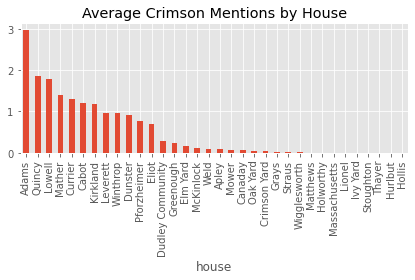

In [ ]:
house_df = df.groupby('house')['numMentions'].mean().sort_values(ascending=False)
# house_df = house_df[house_df > 50] #filter out small houses
house_df.plot.bar()
plt.title('Average Crimson Mentions by House')
plt.tight_layout()
plt.savefig('cleanHousesScaled.pdf', dpi=400)

In [ ]:
print(df)

                    name  numMentions  gender        team         house  \
0          rebecca hayes            0     NaN        None   Pforzheimer   
1         kale catchings            9     0.0  basketball        Lowell   
2          elliott hyman            0     NaN        None       Currier   
3           kofi kwapong            0     NaN        None      Leverett   
4               alex lee            0     0.5     sailing          None   
...                  ...          ...     ...         ...           ...   
5305        kylie hilton            1     1.0       track         Cabot   
5306  stephanie sanjines            0     NaN        None           NaN   
5307     opeyemi olubajo            0     NaN        None  Crimson Yard   
5308            mina lee            0     NaN        None       Dunster   
5309       derek mullahy            0     0.0  ice hockey         Apley   

               year  
0     Class of 2023  
1     Class of 2022  
2     Class of 2023  
3     Class

In [ ]:
numAthletes = len(df[pd.notna(df['team'])])
numAthletes

668

In [ ]:
numNarps = len(df[pd.isna(df['team'])])
numNarps

4642

In [ ]:
numStuds = len(df)

In [ ]:
athleteProp = numAthletes /  numStuds
athleteProp

0.12580037664783428

In [ ]:
totalAthleteMentions = df[~pd.isna(df['team'])]['numMentions'].sum()
totalAthleteMentions

1293

In [ ]:
totalNarpMentions = df[pd.isna(df['team'])]['numMentions'].sum()
totalNarpMentions

5260

In [ ]:
n = totalAthleteMentions + totalNarpMentions
n

6553

In [ ]:
mu = n * athleteProp
mu

824.369868173258

In [ ]:
var = mu * (1 - athleteProp)
var

720.6638282599367

In [ ]:
sigma = var**.5
sigma

26.845182589431882

In [ ]:
z = (totalAthleteMentions - mu) / sigma
z

17.45676827734549

In [ ]:
len(df.name.unique())

5310

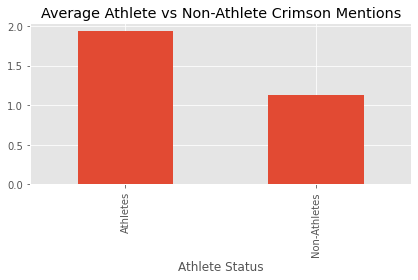

In [ ]:
nonAthleteMentions = df[pd.isna(df['team'])]['numMentions'].mean()
athleteMentions = df[~pd.isna(df['team'])]['numMentions'].mean()
toPlot = pd.Series(data=[athleteMentions, nonAthleteMentions], index=pd.Index(['Athletes', 'Non-Athletes'], name='Athlete Status'))
toPlot.plot.bar()
plt.title('Average Athlete vs Non-Athlete Crimson Mentions')
plt.tight_layout()
plt.savefig('athletes.pdf', dpi=400)


In [ ]:
nonAthleteMentions

1.133132270573029

In [ ]:
athleteMentions

1.93562874251497

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03080ecf-5a60-4397-b627-61e928cf2273' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>